In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import kruskal

In [52]:
from scipy.stats import spearmanr
import math

In [86]:
# Pathextracted CSV
path = r"C:\Users\018464615\Downloads\SEM1\CMPE-255\Project\LLCP2024XPT\LLCP2024_raw.csv"

df = pd.read_csv(path)

In [87]:
# Dataset size and structure
print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns")

print("\nList of column names:")
print(df.columns.tolist())

Dataset contains 457,670 rows and 301 columns

List of column names:
['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'NUMADULT', 'RESPSLC1', 'LANDSEX3', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX3', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINS2', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'LASTDEN4', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'HADMAM', 'HOWLONG', 'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'HADSIGM4', 'COLNSIGM', 'COLNTES1'

In [88]:
cols_to_drop = [
    "FMONTH", "IDATE", "IMONTH", "IDAY", "IYEAR", "SEQNO", "_PSU", 
    "CTELENM1", "COLGHOUS", "STATERE1", "CELPHON1", "LADULT1", 
    "RESPSLC1", "SAFETIME", "CTELNUM1", "CELLFON5", "CADULT1", 
    "LANDLINE", "NUMPHON4"
]

df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

print("Columns removed successfully.")

print("\nList of column names:")
print(df.columns.tolist())

Columns removed successfully.

List of column names:
['_STATE', 'DISPCODE', 'PVTRESD1', 'NUMADULT', 'LANDSEX3', 'CELLSEX3', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINS2', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'LASTDEN4', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'HADMAM', 'HOWLONG', 'CERVSCRN', 'CRVCLCNC', 'CRVCLPAP', 'CRVCLHPV', 'HADHYST2', 'HADSIGM4', 'COLNSIGM', 'COLNTES1', 'SIGMTES1', 'LASTSIG4', 'COLNCNCR', 'VIRCOLO1', 'VCLNTES2', 'SMALSTOL', 'STOLTEST', 'STOOLDN2', 'BLDSTFIT', 'SDNATES1', 'SMOKE100', 'SMOKDAY2', 'USENOW3', 'ECIGNOW3', 'LCSFIRST', 'LCSNUMCG', 'LCSCTSC1', 'LCSSCNCR', 'LCS

In [89]:
# Dropped cols that are not required

In [90]:
# Now we describe column which has DISPCODE=1200
count_1200 = (df["DISPCODE"] == 1200).sum()
print(f"Number of rows with DISPCODE = 1200: {count_1200}")

Number of rows with DISPCODE = 1200: 85446


In [91]:
# Remove rows where DISPCODE == 1200
df = df[df["DISPCODE"] != 1200]

print("Rows with DISPCODE = 1200 have been removed.")

Rows with DISPCODE = 1200 have been removed.


In [92]:
num_complete_rows = df.notnull().all(axis=1).sum()

print(f"Number of rows with no missing values: {num_complete_rows}")

Number of rows with no missing values: 0


In [93]:
# Drop rows where PREDIAB2 is null
df = df[df["PREDIAB2"].notnull()]

print("Rows with null PREDIAB2 values have been removed.")
print(f"Remaining rows: {len(df)}")

Rows with null PREDIAB2 values have been removed.
Remaining rows: 133860


In [94]:
# now print cols with total missing rows
missing_counts = df.isnull().sum()

# Print only columns that have missing values
print(missing_counts[missing_counts > 0])

PVTRESD1    110268
NUMADULT    110271
LANDSEX3    111353
CELLSEX3     24633
PVTRESD3     23592
             ...  
_LCSELIG      5408
_LCSCTSN      7551
_LCSPSTF      5408
_FLSHOT7     83914
_PNEUMO3     83914
Length: 190, dtype: int64


In [95]:
crgv_cols = [col for col in df.columns if "CRGV" in col]
print("CRGV-related columns:")
print(crgv_cols)

CRGV-related columns:
['CRGVREL5', 'CRGVPRB4', 'CRGVALZD', 'CRGVNURS', 'CRGVPER2', 'CRGVHOU2', 'CRGVHRS2', 'CRGVLNG2']


In [96]:
df.groupby("PREDIAB2")[crgv_cols].describe()

CRGVREL5                                                   CRGVPRB4  \
            count       mean        std  min   25%  50%   75%   max    count   
PREDIAB2                                                                       
1.0        2099.0   4.489281   8.962971  1.0  1.00  3.0   6.0  99.0   2099.0   
2.0         125.0   4.360000   8.919352  1.0  1.00  3.0   6.0  99.0    125.0   
3.0        8657.0   4.675638   9.722508  1.0  1.00  3.0   6.0  99.0   8657.0   
7.0          52.0   5.500000  13.439042  1.0  1.00  3.0   6.0  99.0     52.0   
9.0           4.0  27.750000  47.563116  1.0  3.25  5.5  30.0  99.0      4.0   

                                                            CRGVALZD  \
               mean        std  min  25%   50%    75%   max    count   
PREDIAB2                                                               
1.0       10.823726  15.865329  1.0  3.0   9.0  13.00  99.0   1845.0   
2.0        9.664000  12.376450  1.0  3.0  10.0  13.00  99.0    111.0   
3.0       11.629895  17.932032  1.0  3.0   9.0  13.00  99.0   7651.0   
7.0       10.096154  16.712400  1.0  2.0   5.5  13.00  99.0     42.0   
9.0       30.750000  45.770260  1.0  8.5  11.5  33.75  99.0      3.0   

                                                      CRGVNURS            \
              mean       std  min  25%  50%  75%  max    count      mean   
PREDIAB2                                                                   
1.0       1.982114  0.928697  1.0  2.0  2.0  2.0  9.0   2099.0  1.838018   
2.0       1.846847  0.635298  1.0  2.0  2.0  2.0  7.0    125.0  1.712000   
3.0       2.015031  1.000214  1.0  2.0  2.0  2.0  9.0   8657.0  1.860344   
7.0       2.357143  1.750560  1.0  2.0  2.0  2.0  9.0     52.0  1.903846   
9.0       4.000000  4.358899  1.0  1.5  2.0  5.5  9.0      4.0  1.750000   

                                             CRGVPER2                      \
               std  min   25%  50%  75%  max    count      mean       std   
PREDIAB2                                                                    
1.0       0.558719  1.0  2.00  2.0  2.0  9.0   2099.0  1.683659  0.669344   
2.0       0.454653  1.0  1.00  2.0  2.0  2.0    125.0  1.496000  0.501996   
3.0       0.570994  1.0  2.00  2.0  2.0  9.0   8657.0  1.672635  0.679636   
7.0       0.822708  1.0  2.00  2.0  2.0  7.0     52.0  1.750000  0.882843   
9.0       0.500000  1.0  1.75  2.0  2.0  2.0      4.0  1.750000  0.500000   

                                   CRGVHOU2                                \
          min   25%  50%  75%  max    count      mean       std  min  25%   
PREDIAB2                                                                    
1.0       1.0  1.00  2.0  2.0  9.0   2099.0  1.210576  0.607753  1.0  1.0   
2.0       1.0  1.00  1.0  2.0  2.0    125.0  1.096000  0.295777  1.0  1.0   
3.0       1.0  1.00  2.0  2.0  9.0   8657.0  1.230680  0.642058  1.0  1.0   
7.0       1.0  1.00  2.0  2.0  7.0     52.0  1.134615  0.344642  1.0  1.0   
9.0       1.0  1.75  2.0  2.0  2.0      4.0  1.250000  0.500000  1.0  1.0   

                         CRGVHRS2                                          \
          50%   75%  max    count      mean       std  min  25%  50%  75%   
PREDIAB2                                                                    
1.0       1.0  1.00  9.0   2099.0  1.605050  1.190522  1.0  1.0  1.0  2.0   
2.0       1.0  1.00  2.0    125.0  1.768000  1.100850  1.0  1.0  1.0  3.0   
3.0       1.0  1.00  9.0   8657.0  1.578029  1.196090  1.0  1.0  1.0  2.0   
7.0       1.0  1.00  2.0     52.0  1.711538  1.108550  1.0  1.0  1.0  2.0   
9.0       1.0  1.25  2.0      4.0  3.000000  4.000000  1.0  1.0  1.0  3.0   

              CRGVLNG2                                               
          max    count      mean       std  min  25%  50%  75%  max  
PREDIAB2                                                             
1.0       9.0   2099.0  2.782277  1.263535  1.0  2.0  3.0  4.0  9.0  
2.0       7.0    125.0  2.912000  1.143114  1.0  2.

In [97]:
df.groupby("PREDIAB2")[crgv_cols].mean()

,CRGVREL5,CRGVPRB4,CRGVALZD,CRGVNURS,CRGVPER2,CRGVHOU2,CRGVHRS2,CRGVLNG2
PREDIAB2,,,,,,,,
1.0,4.489281,10.823726,1.982114,1.838018,1.683659,1.210576,1.605050,2.782277
2.0,4.360000,9.664000,1.846847,1.712000,1.496000,1.096000,1.768000,2.912000
3.0,4.675638,11.629895,2.015031,1.860344,1.672635,1.230680,1.578029,2.746795
7.0,5.500000,10.096154,2.357143,1.903846,1.750000,1.134615,1.711538,2.769231
9.0,27.750000,30.750000,4.000000,1.750000,1.750000,1.250000,3.000000,3.500000


In [98]:
corrs = df[crgv_cols + ["PREDIAB2"]].corr()["PREDIAB2"].sort_values(ascending=False)
print("Correlation of CRGV variables with PREDIAB2:")
print(corrs)

Correlation of CRGV variables with PREDIAB2:
PREDIAB2    1.000000
CRGVALZD    0.026092
CRGVPRB4    0.018620
CRGVNURS    0.017863
CRGVREL5    0.015976
CRGVHOU2    0.009801
CRGVPER2   -0.000670
CRGVHRS2   -0.003626
CRGVLNG2   -0.009069
Name: PREDIAB2, dtype: float64


In [99]:
# None of the caregiving variables have a linear relationship with prediabetes.

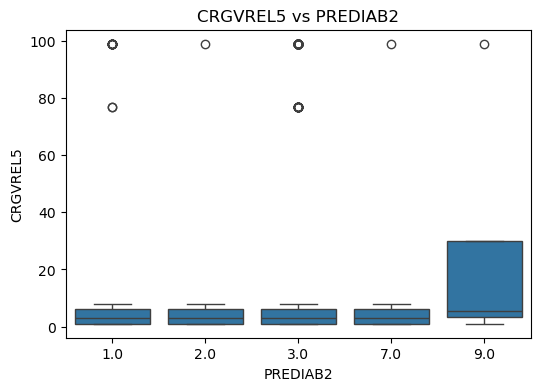

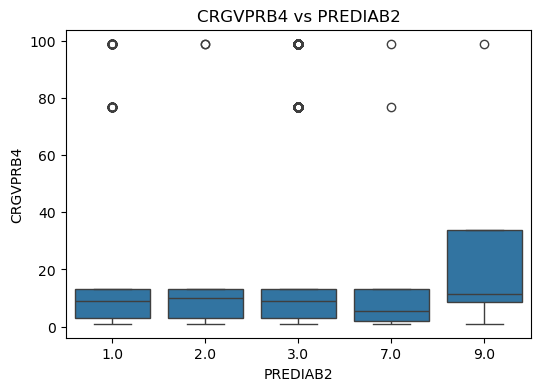

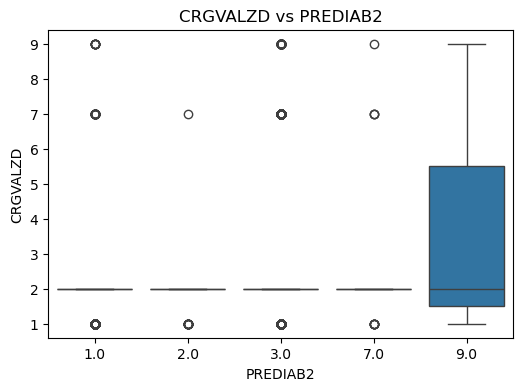

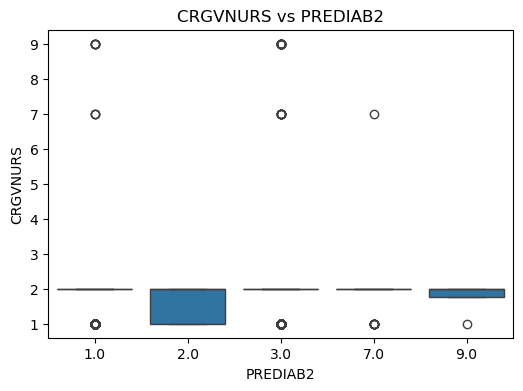

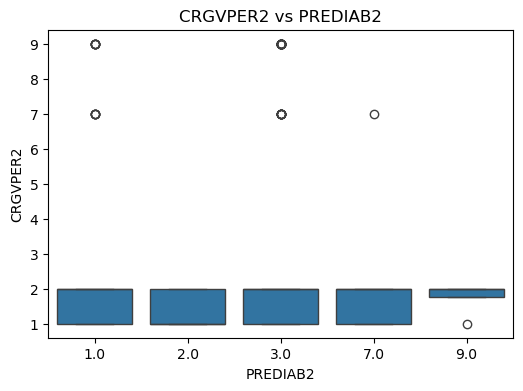

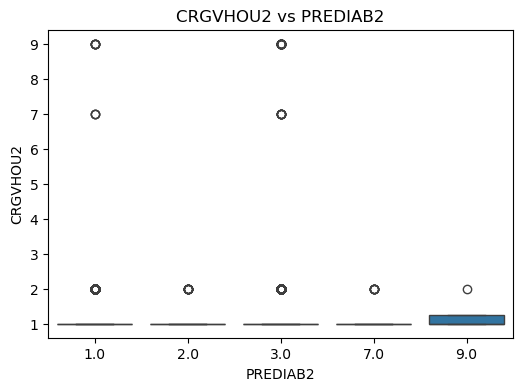

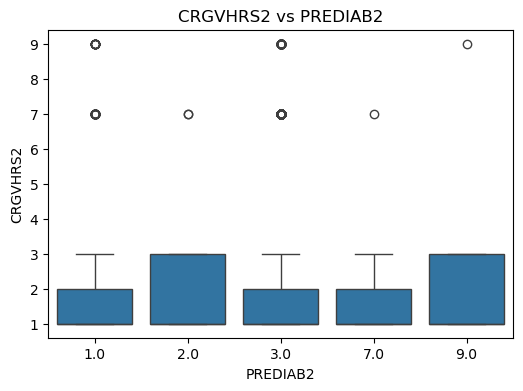

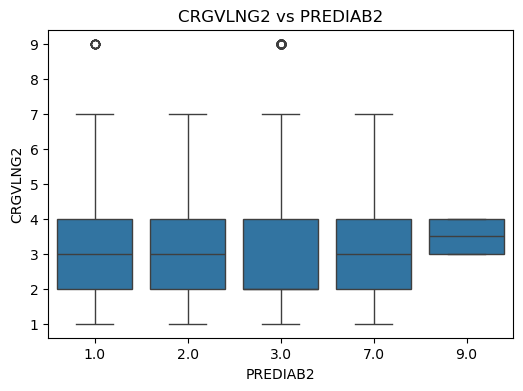

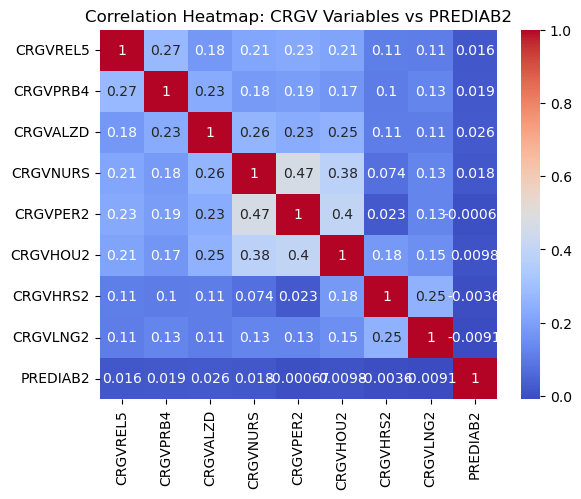

In [100]:
for col in crgv_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="PREDIAB2", y=col, data=df)
    plt.title(f"{col} vs PREDIAB2")
    plt.show()

sns.heatmap(df[crgv_cols + ["PREDIAB2"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: CRGV Variables vs PREDIAB2")
plt.show()

In [101]:
for col in crgv_cols:
    group_yes = df[df["PREDIAB2"] == 1][col].dropna()
    group_no  = df[df["PREDIAB2"] == 2][col].dropna()
    stat, p = ttest_ind(group_yes, group_no, equal_var=False)
    print(f"{col}: p-value = {p:.4f}")

CRGVREL5: p-value = 0.8752
CRGVPRB4: p-value = 0.3190
CRGVALZD: p-value = 0.0365
CRGVNURS: p-value = 0.0035
CRGVPER2: p-value = 0.0001
CRGVHOU2: p-value = 0.0001
CRGVHRS2: p-value = 0.1118
CRGVLNG2: p-value = 0.2226


In [103]:
crgv_cols = [col for col in df.columns if "CRGV" in col]
print("CRGV categorical columns:", crgv_cols)
#Frequency relationship (cross-tab)
#for checking distributions:

for col in crgv_cols:
    print(f"\n=== {col} vs PREDIAB2 ===")
    print(pd.crosstab(df[col], df["PREDIAB2"]))
# This shows how PREDIAB2 values vary across each caregiving category.

#Chi-Square test for association
results = []

for col in crgv_cols:
    #Build contingency table
    table = pd.crosstab(df[col], df["PREDIAB2"])
    
    #Run chi-square test
    chi2, p, dof, expected = chi2_contingency(table)
    
    results.append({"Column": col, "Chi2": chi2, "p-value": p})

# Create results table
chi2_results = pd.DataFrame(results).sort_values(by="p-value")
print(chi2_results)

CRGV categorical columns: ['CRGVREL5', 'CRGVPRB4', 'CRGVALZD', 'CRGVNURS', 'CRGVPER2', 'CRGVHOU2', 'CRGVHRS2', 'CRGVLNG2']

=== CRGVREL5 vs PREDIAB2 ===
PREDIAB2  1.0  2.0   3.0  7.0  9.0
CRGVREL5                          
1.0       687   46  2804   15    1
2.0        54    6   477    2    0
3.0       508   18  1772   14    0
4.0       193   17   859    4    1
5.0        22    1    71    1    0
6.0       175    6   683    5    0
7.0       102   15   462    5    1
8.0       340   15  1435    5    0
77.0        2    0    23    0    0
99.0       16    1    71    1    1

=== CRGVPRB4 vs PREDIAB2 ===
PREDIAB2  1.0  2.0   3.0  7.0  9.0
CRGVPRB4                          
1.0       254   14  1006   10    1
2.0       156   10   599    8    0
3.0       144   11   694    4    0
4.0        92    4   342    2    0
5.0       101    5   448    2    0
6.0        91    5   396    1    0
7.0        84    6   346    1    0
8.0        85    3   279    0    0
9.0        68    1   222    0    0
10.0       4

In [104]:
# Some caregiving variables truly differ between people with and without prediabetes — these ones are worth keeping. Others show no pattern and can be removed.
# These variables show no statistical relationship with prediabetes.
# Their distribution looks the same regardless of the PREDIAB2 value.
# CRGVPRB4 (p ≈ 0.10)
# CRGVLNG2 (p ≈ 0.11)
# CRGVHOU2 (p ≈ 0.34)
# These are unlikely to help our model because:
# They do not distinguish prediabetic vs non-prediabetic groups.
# Including them adds noise, complexity, and risk of overfitting.

#Note we eventually removed all caregiver attributes as they did not benefit the modl

In [105]:
# Find all columns that start with or contain 'ACE' Adverse childhood experience (Childhood trauma)
ace_cols = [col for col in df.columns if col.startswith("ACE")]
print("ACE columns:", ace_cols)

results = []

for col in ace_cols:
    # Only proceed if column has categorical data (more than one unique value)
    if df[col].nunique() > 1:
        table = pd.crosstab(df[col], df["DIABETE4"])
        chi2, p, dof, expected = chi2_contingency(table)
        results.append({"Column": col, "Chi2": chi2, "p-value": p})

# Create and sort results DataFrame
ace_results = pd.DataFrame(results).sort_values(by="p-value")
print(ace_results)
significant_ace = ace_results[ace_results["p-value"] < 0.05]["Column"].tolist()
print("Significant ACE variables:", significant_ace)


def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / (n * (min(k, r) - 1))))

assoc = []

for col in ace_cols:
    if df[col].nunique() > 1:
        table = pd.crosstab(df[col], df["DIABETE4"])
        v = cramers_v(table)
        assoc.append({"Column": col, "CramersV": v})

assoc_df = pd.DataFrame(assoc).sort_values(by="CramersV", ascending=False)
print(assoc_df)

selected_ace_cols = [col for col in ace_cols if col in significant_ace]
print("Final ACE columns to keep:", selected_ace_cols)


ACE columns: ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 'ACEADSAF', 'ACEADNED']
      Column        Chi2       p-value
0   ACEDEPRS  241.897168  6.678773e-45
1   ACEDRINK  190.710684  2.681491e-34
9   ACETTHEM  193.407592  1.698294e-32
7   ACESWEAR  172.421698  2.766385e-28
10  ACEHVSEX  125.024319  5.905593e-19
11  ACEADSAF  142.060791  9.736895e-19
2   ACEDRUGS   82.765370  1.221856e-12
6   ACEHURT1   86.999699  8.898035e-12
5   ACEPUNCH   85.197373  1.899692e-11
12  ACEADNED   77.647394  1.435721e-07
3   ACEPRISN   48.959806  2.125805e-06
8   ACETOUCH   54.774207  3.872956e-06
4   ACEDIVRC   44.446636  1.686578e-04
Significant ACE variables: ['ACEDEPRS', 'ACEDRINK', 'ACETTHEM', 'ACESWEAR', 'ACEHVSEX', 'ACEADSAF', 'ACEDRUGS', 'ACEHURT1', 'ACEPUNCH', 'ACEADNED', 'ACEPRISN', 'ACETOUCH', 'ACEDIVRC']
      Column  CramersV
0   ACEDEPRS  0.075413
1   ACEDRINK  0.066961
9   ACETTHEM  0.058398
7   ACES

In [108]:
# Find all ACE columns
ace_cols = [col for col in df.columns if col.startswith("ACE")]

# Create a summary list
summary = []

for col in ace_cols:
    total_rows = len(df)
    missing = df[col].isna().sum()
    value_counts = df[col].value_counts(dropna=False).to_dict()
    
    summary.append({
        "Column": col,
        "Unique Values": df[col].nunique(),
        "Missing (NaN)": missing,
        "Missing %": round((missing / total_rows) * 100, 2),
        "Value Counts": value_counts
    })

ace_summary = pd.DataFrame(summary)

pd.set_option('display.max_colwidth', None)
print(ace_summary)


      Column  Unique Values  Missing (NaN)  Missing %  \
0   ACEDEPRS              4         119682      89.41   
1   ACEDRINK              4         119682      89.41   
2   ACEDRUGS              4         119682      89.41   
3   ACEPRISN              4         119682      89.41   
4   ACEDIVRC              5         119682      89.41   
5   ACEPUNCH              5         119682      89.41   
6   ACEHURT1              5         119682      89.41   
7   ACESWEAR              5         119682      89.41   
8   ACETOUCH              5         119682      89.41   
9   ACETTHEM              5         119682      89.41   
10  ACEHVSEX              5         119682      89.41   
11  ACEADSAF              7         119682      89.41   
12  ACEADNED              7         119682      89.41   

                                                                            Value Counts  
0                                 {nan: 119682, 2.0: 11697, 1.0: 2292, 7.0: 99, 9.0: 90}  
1                  

In [109]:
#There are many missing values for ACE
#Even though there is a good relation, we cannot seem to use it due to large volume of missing values

      Column   p-value  Cramer's V       Chi2  df
8   ACETOUCH  0.000024    0.035487  35.227764   8
10  ACEHVSEX  0.000348    0.032046  28.768355   8
9   ACETTHEM  0.001431    0.030011  25.212727   8
6   ACEHURT1  0.012542    0.026425  19.469263   8
2   ACEDRUGS  0.067056    0.024973   8.772059   4
5   ACEPUNCH  0.171364    0.020425  11.571628   8
11  ACEADSAF  0.172155    0.019416  21.167682  16
0   ACEDEPRS  0.384034    0.017257   4.165788   4
3   ACEPRISN  0.490574    0.015577   3.417238   4
7   ACESWEAR  0.569091    0.015509   6.702075   8
1   ACEDRINK  0.576258    0.014334   2.890831   4
4   ACEDIVRC  0.692644    0.014113   5.593651   8
12  ACEADNED  0.877727    0.013185   9.782706  16


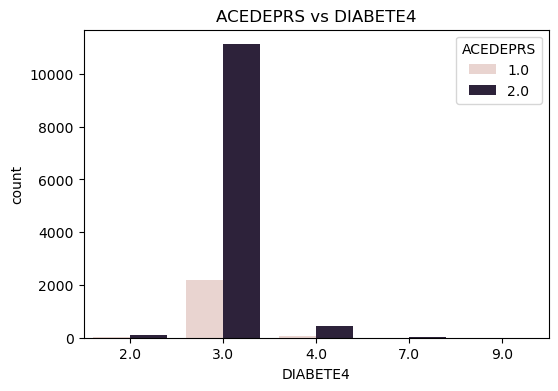

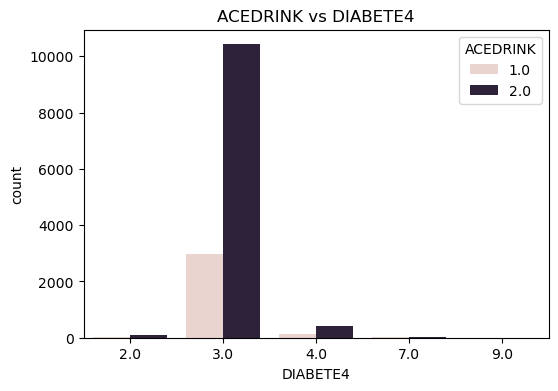

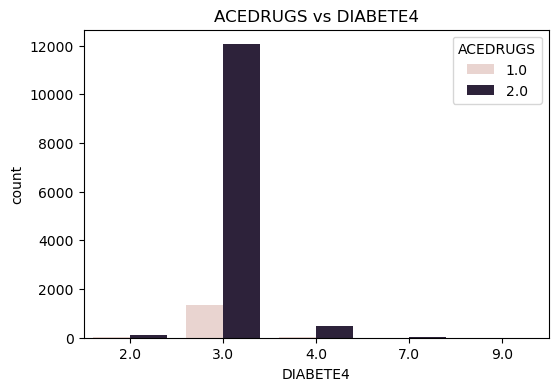

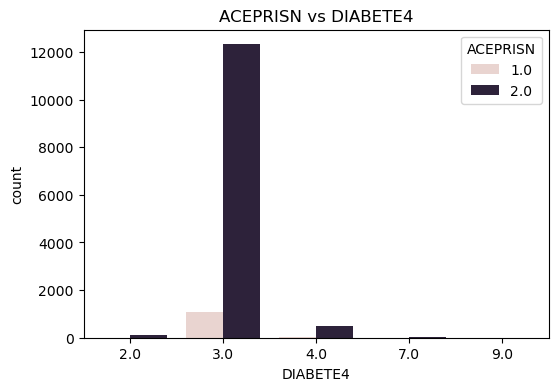

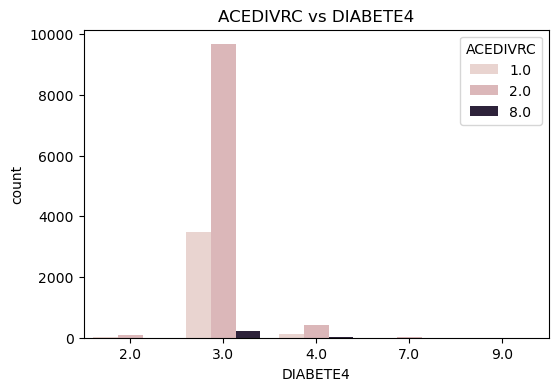

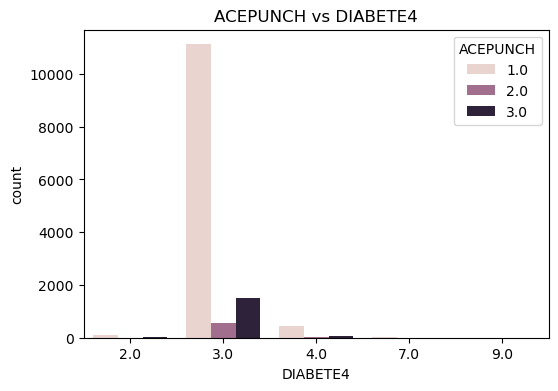

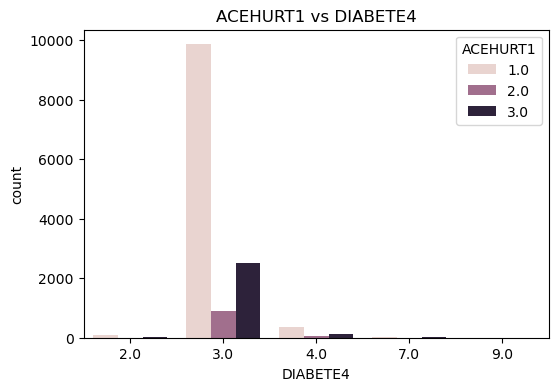

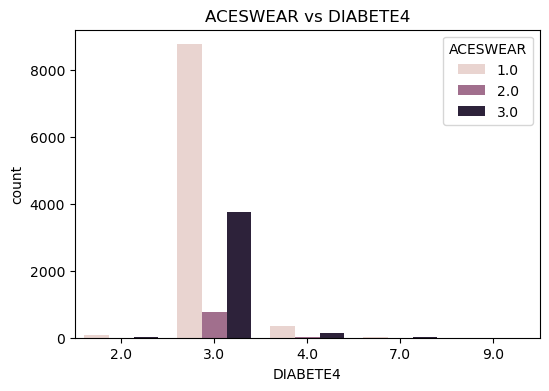

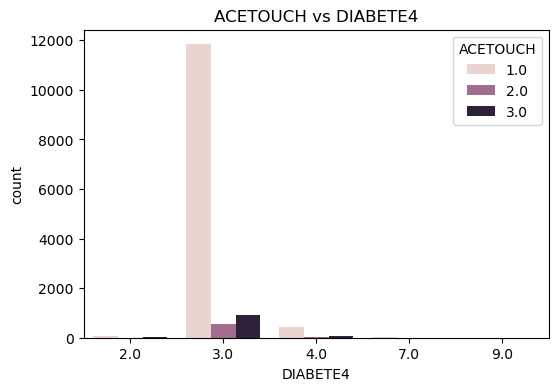

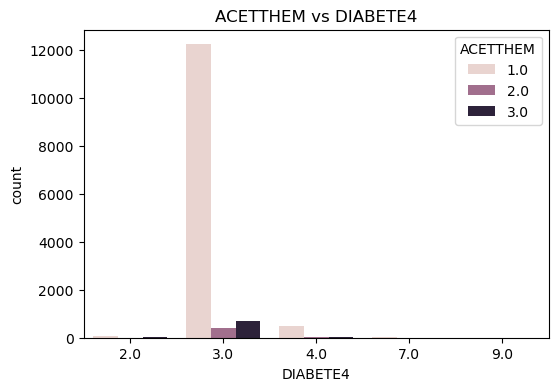

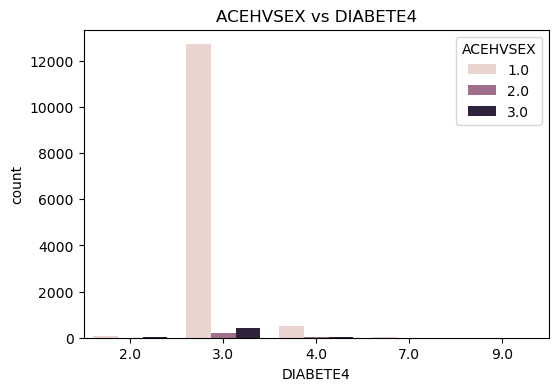

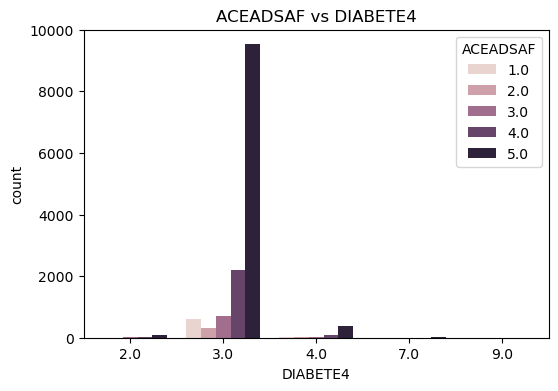

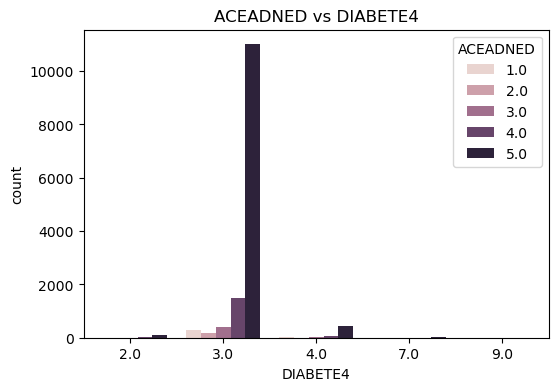

In [110]:
# Clean ACE columns (replace 7, 9, 77, 99 → NaN) as they are either missing or not responsed or refused to respong
for col in ace_cols:
    df[col] = df[col].replace({7: np.nan, 9: np.nan, 77: np.nan, 99: np.nan})

# Drop rows where DIABETE4 is missing
df = df[df["DIABETE4"].notna()]

# Define helper for Cramer's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / (n * (min(k, r) - 1))))

# Store results
results = []

for col in ace_cols:
    table = pd.crosstab(df[col], df["DIABETE4"])
    chi2, p, dof, expected = chi2_contingency(table)
    v = cramers_v(table)
    
    results.append({
        "Column": col,
        "p-value": p,
        "Cramer's V": v,
        "Chi2": chi2,
        "df": dof,
        "Counts": table.to_dict()
    })

# Make DataFrame
ace_results = pd.DataFrame(results).sort_values("p-value")

# Display nicely
pd.set_option('display.max_colwidth', None)
print(ace_results[["Column", "p-value", "Cramer's V", "Chi2", "df"]])

# Optional: See how one example ACE variable varies with diabetes visually


for col in ace_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x="DIABETE4", hue=col, data=df)
    plt.title(f"{col} vs DIABETE4")
    plt.show()


In [111]:
df_ACEAnalysis  = pd.read_csv(path)

# 1) Identify ACE columns (Section Name: Adverse Childhood Experiences )
ace_cols = [col for col in df_ACEAnalysis .columns if col.startswith("ACE")]

# 2) Total rows per state (ensures every state appears)
state_rows = (
    df_ACEAnalysis .groupby("_STATE")
      .size()
      .reset_index(name="Total Rows")
)

# 3) Count EXISTING nulls (NaN) per ACE column for each state
#    This does NOT treat 7/9/77/99 as missing.
state_missing = (
    df_ACEAnalysis .groupby("_STATE")[ace_cols]
      .apply(lambda g: g.isna().sum())
      .reset_index()
)

# 4) Merge so "Total Rows" shows next to each state
summary = state_rows.merge(state_missing, on="_STATE", how="left")

# 5)Totals & % across all ACE variables, still only counting true NaNs
summary["Total ACE NaNs"] = summary[ace_cols].sum(axis=1)
summary["% ACE NaNs"] = (
    summary["Total ACE NaNs"] / (summary["Total Rows"] * len(ace_cols)) * 100
).round(2)

# 6) Sort by state and display
summary = summary.sort_values("_STATE").reset_index(drop=True)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
print(summary)

    _STATE  Total Rows  ACEDEPRS  ACEDRINK  ACEDRUGS  ACEPRISN  ACEDIVRC  \
0      1.0        5092      5092      5092      5092      5092      5092   
1      2.0        5496      5496      5496      5496      5496      5496   
2      4.0        8588      8588      8588      8588      8588      8588   
3      5.0        5344      5344      5344      5344      5344      5344   
4      6.0        8382      8382      8382      8382      8382      8382   
5      8.0       10897     10897     10897     10897     10897     10897   
6      9.0        7213      7213      7213      7213      7213      7213   
7     10.0        4360      4360      4360      4360      4360      4360   
8     11.0        3198      3198      3198      3198      3198      3198   
9     12.0       13086      3187      3214      3218      3222      3228   
10    13.0        7262      1627      1634      1636      1639      1643   
11    15.0        6636       740       755       761       764       767   
12    16.0  

In [112]:
#From this analysis we see that some states havent collected the data for Section Name: Adverse Childhood Experiences 
# ie all colums starting with 'ACE' so if we use those features that might lead to skewed results so we skip the columns

In [113]:
gender_cols = ["SOMALE", "SOFEMALE"]

state_rows = (
    df_ACEAnalysis.groupby("_STATE")
      .size()
      .reset_index(name="Total Rows")
)

state_missing = (
    df_ACEAnalysis.groupby("_STATE")[gender_cols]
      .apply(lambda g: g.isna().sum())
      .reset_index()
)

summary_gender = state_rows.merge(state_missing, on="_STATE", how="left")

summary_gender["Total Missing (SOMALE+SOFEMALE)"] = summary_gender[gender_cols].sum(axis=1)
summary_gender["% Missing (SOMALE+SOFEMALE)"] = (
    summary_gender["Total Missing (SOMALE+SOFEMALE)"] / (summary_gender["Total Rows"] * len(gender_cols)) * 100
).round(2)

summary_gender = summary_gender.sort_values("_STATE").reset_index(drop=True)
pd.set_option("display.max_columns", None)
print(summary_gender)

    _STATE  Total Rows  SOMALE  SOFEMALE  Total Missing (SOMALE+SOFEMALE)  \
0      1.0        5092    3131      2204                             5335   
1      2.0        5496    2794      2808                             5602   
2      4.0        8588    4924      4239                             9163   
3      5.0        5344    5344      5344                            10688   
4      6.0        8382    8382      8382                            16764   
5      8.0       10897   10897     10897                            21794   
6      9.0        7213    3930      3561                             7491   
7     10.0        4360    2563      2109                             4672   
8     11.0        3198    3198      3198                             6396   
9     12.0       13086   13086     13086                            26172   
10    13.0        7262    4440      3406                             7846   
11    15.0        6636    3553      3182                             6735   

In [114]:
#Alot of data for sexual orientationm is missing, many states have not asked the question so skippingit

In [115]:

smoking_cols = ["LASTSMK2", "STOPSMK2"]

state_rows = (
    df_ACEAnalysis.groupby("_STATE")
      .size()
      .reset_index(name="Total Rows")
)

state_missing = (
    df_ACEAnalysis.groupby("_STATE")[smoking_cols]
      .apply(lambda g: g.isna().sum())
      .reset_index()
)

summary_smoking = state_rows.merge(state_missing, on="_STATE", how="left")

summary_smoking["Total Missing (LASTSMK2+STOPSMK2)"] = summary_smoking[smoking_cols].sum(axis=1)
summary_smoking["% Missing (LASTSMK2+STOPSMK2)"] = (
    summary_smoking["Total Missing (LASTSMK2+STOPSMK2)"] / 
    (summary_smoking["Total Rows"] * len(smoking_cols)) * 100
).round(2)

summary_smoking = summary_smoking.sort_values("_STATE").reset_index(drop=True)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
print(summary_smoking)


    _STATE  Total Rows  LASTSMK2  STOPSMK2  Total Missing (LASTSMK2+STOPSMK2)  \
0      1.0        5092      3921      4538                               8459   
1      2.0        5496      5496      5496                              10992   
2      4.0        8588      8588      8588                              17176   
3      5.0        5344      5344      5344                              10688   
4      6.0        8382      8382      8382                              16764   
5      8.0       10897     10897     10897                              21794   
6      9.0        7213      7213      7213                              14426   
7     10.0        4360      3251      4030                               7281   
8     11.0        3198      3198      3198                               6396   
9     12.0       13086      9619     11894                              21513   
10    13.0        7262      5632      6618                              12250   
11    15.0        6636      

In [116]:
#Will discard this since many states did not ask the question

In [117]:
mj_col = ["MARIJAN1"]

state_rows = (
    df_ACEAnalysis.groupby("_STATE")
      .size()
      .reset_index(name="Total Rows")
)

state_missing = (
    df_ACEAnalysis.groupby("_STATE")[mj_col]
      .apply(lambda g: g.isna().sum())
      .reset_index()
)

summary_mj = state_rows.merge(state_missing, on="_STATE", how="left")

summary_mj["% Missing (MARIJAN1)"] = (
    summary_mj["MARIJAN1"] / summary_mj["Total Rows"] * 100
).round(2)

summary_mj = summary_mj.sort_values("_STATE").reset_index(drop=True)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
print(summary_mj)


    _STATE  Total Rows  MARIJAN1  % Missing (MARIJAN1)
0      1.0        5092      5092                100.00
1      2.0        5496      5496                100.00
2      4.0        8588      8588                100.00
3      5.0        5344      5344                100.00
4      6.0        8382      2402                 28.66
5      8.0       10897     10897                100.00
6      9.0        7213      1418                 19.66
7     10.0        4360       922                 21.15
8     11.0        3198       539                 16.85
9     12.0       13086     13086                100.00
10    13.0        7262      7262                100.00
11    15.0        6636       925                 13.94
12    16.0        4354      4354                100.00
13    17.0       11980      1718                 14.34
14    18.0       13050      2301                 17.63
15    19.0        8735      8735                100.00
16    20.0       10888     10888                100.00
17    21.0

In [118]:
#29 out of 52 areas have not asked about it so we cant use it to make a decision

In [119]:
df = df_ACEAnalysis
#Female respondents that have had a cervical screening test, had mamogram and cervical cancer, intact cervix and pap screening,etc 
screening_vars = ["CERVSCRN", "CRVCLCNC", "CRVCLHPV", "CRVCLPAP", "HADHYST2", "HADMAM"]

cols_to_use = screening_vars + ["DIABETE4"]
dfw = df[cols_to_use].copy()

#     1 = Diabetes, 3 = No, 4 = Prediabetic
valid_diab = [1, 3, 4]
dfw = dfw[dfw["DIABETE4"].isin(valid_diab)].copy()
status_map = {1: "Diabetes", 3: "No", 4: "Prediabetic"}
dfw["Diabetes_Status"] = dfw["DIABETE4"].map(status_map)

for col in screening_vars:
    dfw[col] = dfw[col].astype("category")

def cramers_v(conf_matrix):
    chi2 = chi2_contingency(conf_matrix)[0]
    n = conf_matrix.to_numpy().sum()
    r, k = conf_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

results = []

for col in screening_vars:
    table = pd.crosstab(dfw[col], dfw["Diabetes_Status"])
    if table.shape[0] > 1 and table.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(table)
        v = cramers_v(table)
        results.append({
            "Variable": col,
            "Chi2": chi2,
            "p-value": p,
            "df": dof,
            "CramersV": v,
            "N": int(table.to_numpy().sum())
        })

res_df = pd.DataFrame(results).sort_values("p-value").reset_index(drop=True)
pd.set_option("display.max_columns", None)
print("\n=== Chi-Square results: Screening variables vs Diabetes_Status ===")
print(res_df[["Variable", "p-value", "CramersV", "Chi2", "df", "N"]])

sig_vars = res_df[res_df["p-value"] < 0.05]["Variable"].tolist()
if sig_vars:
    print("\n=== Crosstabs for variables significantly associated with Diabetes_Status (p < 0.05) ===")
    for v in sig_vars:
        print(f"\n{v} vs Diabetes_Status")
        print(pd.crosstab(dfw[v], dfw["Diabetes_Status"]))
else:
    print("\nNo significant association (p < 0.05) found between these variables and Diabetes_Status.")



=== Chi-Square results: Screening variables vs Diabetes_Status ===
   Variable        p-value  CramersV         Chi2  df       N
0  CRVCLCNC   0.000000e+00  0.069153  1675.957304  12  175230
1  HADHYST2   0.000000e+00  0.097311  4153.187229   6  219293
2    HADMAM   0.000000e+00  0.106572  5090.333077   6  224092
3  CRVCLHPV  2.068456e-113  0.039314   539.952484   6  174674
4  CRVCLPAP   1.064969e-41  0.024258   205.875139   6  174926
5  CERVSCRN   1.198183e-39  0.020987   196.239244   6  222768

=== Crosstabs for variables significantly associated with Diabetes_Status (p < 0.05) ===

CRVCLCNC vs Diabetes_Status
Diabetes_Status  Diabetes     No  Prediabetic
CRVCLCNC                                     
1.0                  5712  45677         1281
2.0                  3179  25763          746
3.0                  2351  16337          522
4.0                  2318  14936          493
5.0                  9082  38779         1439
7.0                  1009   4906          183
9.0        

In [120]:
# CRVCLCNC (Cramer’s V = 0.069) Shows only a weak association with diabetes statistically significant but not practically meaningful, so discarding for modeling.
# CRVCLHPV (Cramer’s V = 0.039)   Very weak relationship; differences across diabetes groups are negligible, making it unsuitable for prediction.
# CRVCLPAP (0.024) & CERVSCRN (0.021) Trivial association strengths; effectively no predictive value for diabetes outcome.
# We will only sue HADHYST2 and HADMAM
#we removed HADMAM at the end since it could not cause
#Initially it was kept because there could be some relation to the cause which lead to dr suggesting getting a mamogram to a person and diabetes

In [121]:
# --- Cancer survivorship variables vs Diabetes analysis (one block) ---
# Inputs: df with columns below + DIABETE4 (1=Diabetes, 3=No, 4=Prediabetic)
cat_vars = [
    "CSRVCLIN","CSRVDEIN","CSRVDOC1","CSRVINSR","CSRVINST","CSRVRTRN","CSRVSUM",
    "CSRVTRT3","CSRVCTL2","CSRVPAIN","CNCRDIFF","CNCRTYP2"
]
cont_vars = ["CNCRAGE"]  # numeric: 1..97 valid, 98/99 special

use_cols = cat_vars + cont_vars + ["DIABETE4"]
dfw = df[use_cols].copy()

valid_diab = [1,3,4]
dfw = dfw[dfw["DIABETE4"].isin(valid_diab)].copy()
status_map = {1:"Diabetes", 3:"No", 4:"Prediabetic"}
dfw["Diabetes_Status"] = dfw["DIABETE4"].map(status_map)

for c in cat_vars:
    dfw[c] = pd.to_numeric(dfw[c], errors="coerce")
    dfw[c] = dfw[c].replace({7:np.nan, 9:np.nan, 77:np.nan, 99:np.nan})

dfw["CNCRDIFF"] = dfw["CNCRDIFF"].where(dfw["CNCRDIFF"].isin([1,2,3]), np.nan)
dfw["CNCRTYP2"] = dfw["CNCRTYP2"].where(dfw["CNCRTYP2"].between(1,30), np.nan)

if "CNCRAGE" in dfw.columns:
    dfw["CNCRAGE"] = pd.to_numeric(dfw["CNCRAGE"], errors="coerce")
    dfw["CNCRAGE"] = dfw["CNCRAGE"].where(dfw["CNCRAGE"].between(1,97), np.nan)

#Cramer's V + Chi-square
def cramers_v_from_table(tab: pd.DataFrame) -> float:
    chi2, _, _, _ = chi2_contingency(tab)
    n = tab.to_numpy().sum()
    r, k = tab.shape
    if n == 0 or min(r,k) <= 1:
        return np.nan
    return np.sqrt(chi2 / (n * (min(r,k) - 1)))

#Chi-square for categorical variables
chi_rows = []
for c in cat_vars:
    tab = pd.crosstab(dfw[c], dfw["Diabetes_Status"])  # NaNs dropped automatically
    if tab.shape[0] >= 2 and tab.shape[1] >= 2 and tab.to_numpy().sum() > 0:
        chi2, p, dof, _ = chi2_contingency(tab)
        V = cramers_v_from_table(tab)
        chi_rows.append({
            "Variable": c, "p_value": p, "CramersV": V, "Chi2": chi2, "df": dof,
            "N": int(tab.to_numpy().sum())
        })

chi_df = pd.DataFrame(chi_rows).sort_values("p_value").reset_index(drop=True)

print("\n=== Chi-Square: Cancer survivorship categorical vars vs Diabetes_Status ===")
if not chi_df.empty:
    print(chi_df[["Variable","p_value","CramersV","Chi2","df","N"]].to_string(index=False))
else:
    print("No eligible variables / insufficient data.")

#CNCRAGE (numeric) vs Diabetes groups: Kruskal–Wallis
if "CNCRAGE" in dfw.columns:
    sub = dfw[["CNCRAGE","Diabetes_Status"]].dropna()
    if not sub.empty and sub["Diabetes_Status"].nunique() >= 2:
        order = ["No","Prediabetic","Diabetes"]
        groups = [sub.loc[sub["Diabetes_Status"]==g, "CNCRAGE"] for g in order if g in sub["Diabetes_Status"].unique()]
        if len(groups) >= 2 and all(len(g)>0 for g in groups):
            stat, p = kruskal(*groups)
            sizes = {g:int((sub["Diabetes_Status"]==g).sum()) for g in order if g in sub["Diabetes_Status"].unique()}
            print("\n=== Kruskal–Wallis: CNCRAGE across Diabetes_Status ===")
            print(f"Statistic: {stat:.4f} | p-value: {p:.6g} | Group sizes: {sizes}")
        else:
            print("\nCNCRAGE Kruskal–Wallis: insufficient group data.")
    else:
        print("\nCNCRAGE Kruskal–Wallis: no valid rows.")

if not chi_df.empty:
    keep = chi_df[(chi_df["p_value"] < 0.05) & (chi_df["CramersV"] >= 0.05)]["Variable"].tolist()
    optional = chi_df[(chi_df["p_value"] < 0.05) & (chi_df["CramersV"] < 0.05)]["Variable"].tolist()
    drop = chi_df[chi_df["p_value"] >= 0.05]["Variable"].tolist()

    print("\n=== Suggested feature decision (rules: p<0.05 & V>=0.05 keep) ===")
    print("Keep (stat.+practical):", keep if keep else "None")
    print("Optional (stat. only, weak V):", optional if optional else "None")
    print("Drop (not significant):", drop if drop else "None")

for v in chi_df.head(3)["Variable"]:
    print(f"\nCrosstab: {v} vs Diabetes_Status")
    print(pd.crosstab(dfw[v], dfw["Diabetes_Status"]))



=== Chi-Square: Cancer survivorship categorical vars vs Diabetes_Status ===
Variable      p_value  CramersV       Chi2  df     N
CNCRTYP2 6.598272e-17  0.083302 189.207114  54 13633
CSRVDOC1 5.208435e-03  0.069716  31.193146  14  3209
CSRVCTL2 2.534552e-02  0.113543  14.413259   6   559
 CSRVSUM 7.945375e-02  0.039291   5.065160   2  3281
CSRVPAIN 8.494864e-02  0.028938   4.931417   2  5889
CSRVRTRN 1.143884e-01  0.035458   4.336312   2  3449
CNCRDIFF 1.378405e-01  0.015570   6.963297   4 14362
CSRVTRT3 2.200913e-01  0.029570  10.686692   8  6111
CSRVDEIN 2.624249e-01  0.027665   2.675581   2  3496
CSRVINST 5.592045e-01  0.021791   1.162480   2  2448
CSRVINSR 8.018030e-01  0.011274   0.441785   2  3476
CSRVCLIN 9.623586e-01  0.004708   0.076736   2  3462

=== Kruskal–Wallis: CNCRAGE across Diabetes_Status ===
Statistic: 31.8297 | p-value: 1.22537e-07 | Group sizes: {'No': 10372, 'Prediabetic': 401, 'Diabetes': 2824}

=== Suggested feature decision (rules: p<0.05 & V>=0.05 keep) ===
Ke

In [122]:
# DROP CSRVSUM, CSRVPAIN, CSRVRTRN, CNCRDIFF, CSRVTRT3, CSRVDEIN, CSRVINST, CSRVINSR, CSRVCLIN as
# p > 0.05 and Cramer’s V < 0.05 → no meaningful relationship with diabetes.
# Keep CNCRTYP2, CSRVDOC1, CSRVCTL2, CNCRAGE
# Statistically significant with weak-to-moderate strength; medically plausible links to diabetes.

In [123]:
#we edited the original df so we reloaded from csv
df = pd.read_csv(path)

# Keep valid diabetes responses
df = df[df["DIABETE4"].isin([1, 3])].copy()

# Binary diabetes label: 1 = has diabetes, 0 = no/pre-diabetes
df["diabetes"] = df["DIABETE4"].map({1:1, 2:0, 4:0})
# Now clean the caregiver block so missing/“not asked” values don’t bias the test:

caregiver_vars = [
    "CAREGIV1", "CRGVALZD", "CRGVHOU2", "CRGVHRS2",
    "CRGVLNG2", "CRGVNURS", "CRGVPER2", "CRGVPRB4", "CRGVREL5"
]

# Replace BRFSS codes 7/8/9/77/88/99 with 'Unknown'
for col in caregiver_vars:
    df[col] = df[col].replace([7,8,9,77,88,99], "Unknown")
    df[col] = df[col].fillna("Not asked").astype(str)

from scipy.stats import chi2_contingency
import math

def cramers_v(confusion):
    chi2 = chi2_contingency(confusion, correction=False)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    return math.sqrt((chi2/n) / (min(k-1, r-1)))

results = []
for col in caregiver_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({"variable": col, "p_value": p, "cramers_v": v, "levels": ct.shape[0]})

pd.DataFrame(results).sort_values("p_value")


C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2730727318.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2/n) / (min(k-1, r-1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2730727318.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2/n) / (min(k-1, r-1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2730727318.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2/n) / (min(k-1, r-1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2730727318.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2/n) / (min(k-1, r-1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2730727318.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2/n) / (min(k-1, r-1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2730727318.py:28: RuntimeWarning: invalid value encounte

,variable,p_value,cramers_v,levels
0,CAREGIV1,1.0,NaN,4
1,CRGVALZD,1.0,NaN,4
2,CRGVHOU2,1.0,NaN,4
3,CRGVHRS2,1.0,NaN,5
4,CRGVLNG2,1.0,NaN,6
5,CRGVNURS,1.0,NaN,4
6,CRGVPER2,1.0,NaN,4
7,CRGVPRB4,1.0,NaN,12
8,CRGVREL5,1.0,NaN,8


In [124]:
# We cleaned categorical variables (fixed missing codes).
# Created cross-tabs between each caregiver var and diabetes label.
# Ran Chi-Square tests to see if distributions differ.
# Calculated Cramér’s V to measure strength.
# Collected all results in a summary table for quick comparison.
# The outcome:
# Statistically: Only CRGVREL5 shows significance.
# Practically: All caregiver variables have negligible effect on diabetes status. 
#(this might likely be because the person to whom care is given is a blood 
#relative and has a health condition,

In [125]:
# === Cognitive Decline Variables vs Diabetes Association Test ===
df = pd.read_csv(path)   # or use pyreadstat.read_xport("LLCP2024.XPT")[0]
cog_vars = ["CIMEMLO1", "CDWORRY", "CDDISCU1", "CDHOUS1", "CDSOCIA1"]

# Keeping only valid diabetes responses only (1=Yes, 2=No, 4=Prediabetes)
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

# Clean categorical variables: replace DK/refused codes and fill missing
for col in cog_vars:
    df[col] = df[col].replace([7, 8, 9, 77, 88, 99], "Unknown")
    df[col] = df[col].fillna("Not_asked").astype(str)

def cramers_v(confusion):
    chi2 = chi2_contingency(confusion, correction=False)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

#Ran Chi-Square + Cramér’s V for each variable
results = []
for col in cog_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({
        "variable": col,
        "p_value": p,
        "cramers_v": v,
        "levels": ct.shape[0],
        "n": int(ct.values.sum())
    })

results_df = pd.DataFrame(results).sort_values("p_value")
print("\n=== Cognitive Decline Variables vs Diabetes ===")
print(results_df.to_string(index=False, float_format="%.6f"))



=== Cognitive Decline Variables vs Diabetes ===
variable  p_value  cramers_v  levels      n
CIMEMLO1 0.000000   0.079520       4 441934
 CDHOUS1 0.000000   0.059947       4 441934
CDSOCIA1 0.000000   0.056958       4 441934
CDDISCU1 0.000000   0.056650       4 441934
 CDWORRY 0.000000   0.056107       4 441934


In [126]:
#Keep CIMEMLO1(During the past 12 months, have you experienced difficulties with thinking or memory that are happening more often or are getting worse?)
#in initial feature set	It’s the most informative (highest Cramér’s V).	
#Dropping CDHOUS1 and CDSOCIA1,CDDISCU1 and CDWORRY early as Very weak, redundant, smaller sample.	

In [127]:
#Disability Variables

disability_vars = ["DEAF", "BLIND", "DECIDE", "DIFFWALK", "DIFFDRES", "DIFFALON"]

# Keep valid diabetes responses only (1=Yes, 2=No, 4=Prediabetes)
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

# Clean categorical variables: replace DK/refused codes and fill missing
for col in disability_vars:
    df[col] = df[col].replace([7, 8, 9, 77, 88, 99], "Unknown")
    df[col] = df[col].fillna("Not_asked").astype(str)

def cramers_v(confusion):
    chi2 = chi2_contingency(confusion, correction=False)[0]
    n = confusion.sum().sum()
    r, k = confusion.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

#Run Chi-Square + Cramér’s V for each variable
results = []
for col in disability_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({
        "variable": col,
        "p_value": p,
        "cramers_v": v,
        "levels": ct.shape[0],
        "n": int(ct.values.sum())
    })

results_df = pd.DataFrame(results).sort_values("p_value")
print("\n=== Disability Variables vs Diabetes ===")
print(results_df.to_string(index=False, float_format="%.6f"))



=== Disability Variables vs Diabetes ===
variable  p_value  cramers_v  levels      n
    DEAF 0.000000   0.097803       4 441934
   BLIND 0.000000   0.096140       4 441934
DIFFWALK 0.000000   0.220843       4 441934
DIFFDRES 0.000000   0.105025       4 441934
DIFFALON 0.000000   0.106423       4 441934
  DECIDE 0.000000   0.056112       4 441934


In [129]:
#Walking difficulty (DIFFWALK) has the strongest association with diabetes, other disability variables are real but weak

In [130]:
#Exercise & Healthy-Days Variables vs Diabetes

df = df[df["DIABETE4"].isin([1,3])].copy()
df["diabetes"] = df["DIABETE4"].map({1:1, 3:0}).astype(int)

vars_cat = ["EXERANY2"] #yes no
vars_num = ["PHYSHLTH", "MENTHLTH", "POORHLTH"] #meaningful order/ordinal

for col in vars_cat:
    df[col] = df[col].replace([7,8,9,77,88,99], "Unknown").astype(str)

for col in vars_num:
    df[col] = df[col].replace(88, 0).replace([77,99], pd.NA)

# Cramér’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2/n)/(min(k-1,r-1)))

#Chi-square for EXERANY2
ct = pd.crosstab(df["EXERANY2"], df["diabetes"])
chi2, p, dof, _ = chi2_contingency(ct, correction=False)
v = cramers_v(ct)
print(f"\nEXERANY2  p={p:.6e},  Cramér's V={v:.3f}")

#Spearman correlations for numeric days not good var
for col in vars_num:
    valid = df[[col,"diabetes"]].dropna()
    rho, p = spearmanr(valid[col], valid["diabetes"])
    print(f"{col:<10}  Spearman r={rho:.3f},  p={p:.6e}")



EXERANY2  p=0.000000e+00,  Cramér's V=0.146
PHYSHLTH    Spearman r=0.141,  p=0.000000e+00
MENTHLTH    Spearman r=0.001,  p=4.005880e-01
POORHLTH    Spearman r=0.087,  p=0.000000e+00


In [131]:
# Keep:EXERANY2,PHYSHLTH,POORHLTH
# MENTHLTH	maybe

In [132]:
#Shingles Vaccine, E-Cigarette, and Sugar-Sweetened Beverage Variables vs Diabetes

cat_vars = ["SHINGLE2", "ECIGNOW3"]     # categorical
num_vars = ["SSBSUGR2", "SSBFRUT3"]     # numeric-coded frequencies
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

for col in cat_vars:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99], "Unknown")
        .fillna("Not_asked")
        .astype(str)
    )

for col in num_vars:
    s = df[col].replace({777: np.nan, 999: np.nan, 888: 0})
    df[col] = pd.to_numeric(s, errors="coerce").astype(float)

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

results = []

#Chi-square for categorical
for col in cat_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({
        "variable": col,
        "test": "Chi-square",
        "statistic": chi2,
        "p_value": p,
        "effect": v
    })

#numeric so Spearman correlation
for col in num_vars:
    valid = df[[col, "diabetes"]].dropna()
    rho, p = spearmanr(valid[col], valid["diabetes"])
    results.append({
        "variable": col,
        "test": "Spearman r",
        "statistic": rho,
        "p_value": p,
        "effect": abs(rho)
    })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Vaccine / E-Cigarette / Sugar Drink Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Vaccine / E-Cigarette / Sugar Drink Variables vs Diabetes ===
variable       test     statistic       p_value       effect
ECIGNOW3 Chi-square  1.439897e+03 3.115753e-309 5.708040e-02
SSBFRUT3 Spearman r -1.057932e-01 6.500030e-272 1.057932e-01
SSBSUGR2 Spearman r -9.430178e-02 6.622199e-217 9.430178e-02
SHINGLE2 Chi-square  6.372601e+02 8.423841e-138 3.797341e-02


In [133]:
# More sugary soda intake is associated with lower diabetes prevalence, which is wrong. The result is probably because those who have diabetes have stopped or reduced sugar intake, so resukts are wrong
#Here we need more better data on lifestyle before diabetes diagnosis
# Dropping as the data does not indicate before or after diabetes diagnosis:  ['SSBFRUT3', 'SSBSUGR2', 'ECIGNOW3']
# Dropping due to weak relation:  ['SHINGLE2']

=== Chi-square Test ===
QSTLANG      1.0    2.0
diab_bin               
0         359056  17069
1          62566   3243

Chi2 = 19.32,  p-value = 1.107e-05,  dof = 1
→ Statistically significant association between Language and Diabetes.

=== Diabetes Prevalence by Language ===
QSTLANG
1.0    14.839358
2.0    15.965931
Name: diab_bin, dtype: float64


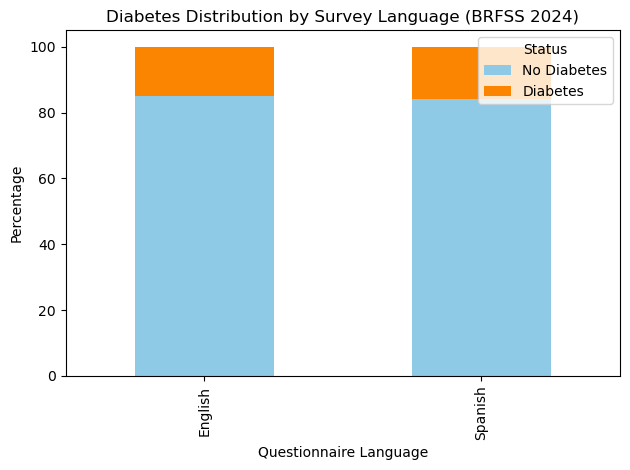

In [134]:
df['QSTLANG'] = df['QSTLANG'].replace({7: pd.NA, 9: pd.NA})
df = df.dropna(subset=['QSTLANG', 'DIABETE4'])

df['diab_bin'] = df['DIABETE4'].map({1: 1, 3: 0})

#Chi-square test
ct = pd.crosstab(df['diab_bin'], df['QSTLANG'])
chi2, p, dof, exp = chi2_contingency(ct)
print("=== Chi-square Test ===")
print(ct)
print(f"\nChi2 = {chi2:.2f},  p-value = {p:.3e},  dof = {dof}")
if p < 0.05:
    print("→ Statistically significant association between Language and Diabetes.")
else:
    print("→ No significant difference in diabetes rates by language.")

lang_rates = df.groupby('QSTLANG')['diab_bin'].mean() * 100
print("\n=== Diabetes Prevalence by Language ===")
print(lang_rates)

labels = {1: "English", 2: "Spanish"}
lang_labels = df['QSTLANG'].map(labels)


lang_summary = pd.crosstab(lang_labels, df['diab_bin'], normalize='index') * 100
lang_summary.columns = ['No Diabetes', 'Diabetes']

lang_summary.plot(kind='bar', stacked=True, color=['#8ecae6', '#fb8500'])
plt.title("Diabetes Distribution by Survey Language (BRFSS 2024)")
plt.ylabel("Percentage")
plt.xlabel("Questionnaire Language")
plt.legend(title="Status", loc="upper right")
plt.tight_layout()
plt.show()


In [135]:
#Strong satistical influence of language of survey as the data size is large so 1% makes a bit of a difference
#does not causes diabetes differences — it reflects: demographic differences, age differences, socioeconomic profiles which we have considered in other features

In [136]:
# === Immunization Variables vs Diabetes ===

immun_vars = ["FLUSHOT7", "FLSHTMY3", "IMFVPLA5", "PNEUVAC4"]
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

for col in immun_vars:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99, 777777, 999999], "Unknown")
        .fillna("Not_asked")
        .astype(str)
    )

#Cramér’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

#Chi-square test for each variable
results = []
for col in immun_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })

results_df = pd.DataFrame(results).sort_values("p_value")
print("\n=== Immunization Variables vs Diabetes ===")
print(results_df.to_string(index=False, float_format="%.6e"))



=== Immunization Variables vs Diabetes ===
variable      p_value    cramers_v  levels      n
FLUSHOT7 0.000000e+00 9.852438e-02       4 441934
FLSHTMY3 0.000000e+00 1.014773e-01      33 441934
IMFVPLA5 0.000000e+00 1.164529e-01      11 441934
PNEUVAC4 0.000000e+00 1.776219e-01       4 441934


In [139]:
# FLSHTMY3 (timing of flu shot)-might discard this as it does not have any effect on diabetes
#We might use these for feature selection. 
# PNEUVAC4 (pneumonia vaccine) → 0.152
# FLUSHOT7 (flu shot) → 0.081
# IMFVPLA5 (flu vaccine place) → 0.080
#This alSo shows that diabetics receive/shoot immunizations at much higher rates.

In [140]:
# === HIV/AIDS Variables vs Diabetes ===
hiv_vars = ["HIVTST7", "HIVTSTD3", "HIVRISK5"]
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

for col in hiv_vars:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99, 777777, 999999], "Unknown")
        .fillna("Not_asked")
        .astype(str)
    )

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

#Chi-square test for each HIV variable
results = []
for col in hiv_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })
results_df = pd.DataFrame(results).sort_values("p_value")
print("\n=== HIV/AIDS Variables vs Diabetes ===")
print(results_df.to_string(index=False, float_format="%.6e"))



=== HIV/AIDS Variables vs Diabetes ===
variable       p_value    cramers_v  levels      n
HIVTSTD3 4.277956e-140 6.420896e-02     535 441934
HIVRISK5 8.422789e-140 3.824728e-02       4 441934
 HIVTST7  2.501844e-30 1.785133e-02       4 441934


In [141]:
# Time since last HIV test (HIVTSTD3) demonstrated the strongest effect but does not play a part in the cause
#it can indicate that individuals with diabetes are more engaged with routine clinical screenings and same for Ever having been tested for HIV (HIVTST7)
#Perceived HIV risk (HIVRISK5) shows a weak association.

In [142]:
df = pd.read_csv(path)

hpv_vars = ["HPVADVC4", "HPVADSH1"]
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

for col in hpv_vars:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99], "Unknown")
        .fillna("Not_asked")
        .astype(str)
    )

#Cramér’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

#Chi-Square for each HPV variable
results = []
for col in hpv_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({
        "variable": col,
        "p_value": p,
        "cramers_v": v,
        "levels": ct.shape[0],
        "n": int(ct.values.sum())
    })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== HPV Vaccination Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== HPV Vaccination Variables vs Diabetes ===
variable       p_value    cramers_v  levels      n
HPVADVC4 4.299708e-276 5.383965e-02       5 441934
HPVADSH1  1.709827e-68 2.719401e-02       6 441934


In [143]:
# Variable	p-value	Cramér’s V	Strength	Meaning
# HPVADVC4 Weak-to-moderate	Highly significant, but the relationship exists only because vaccinated people are younger and younger people rarely have diabetes).
# HPVADSH1 (number of HPV shots-Weak	dropping

#Dropping HPVADVC4 and HPVADSH1
#They dont add independent predictive value; they’re just age indicators

In [144]:
# === Marijuana Use Variables vs Diabetes ===
marijuana_vars_cat = ["MARJSMOK", "MARJEAT", "MARJVAPE", "MARJDAB", "MARJOTHR"]
marijuana_vars_num = ["MARIJAN1"]  # numeric variable (days of use)

df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

for col in marijuana_vars_cat:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99], "Unknown")
        .fillna("Not_asked")
        .astype(str)
    )

for col in marijuana_vars_num:
    # 88 = none -> 0 days, 77/99 = don't know/refused -> NaN
    s = df[col].replace({88: 0, 77: np.nan, 99: np.nan})
    df[col] = pd.to_numeric(s, errors="coerce").astype(float)

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

results = []

# Categorical: Chi-square
for col in marijuana_vars_cat:
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "test": "Chi-square",
            "statistic": chi2,
            "p_value": p,
            "effect": v
        })

# Numeric: Spearman
for col in marijuana_vars_num:
    valid = df[[col, "diabetes"]].dropna()
    if not valid.empty:
        rho, p = spearmanr(valid[col], valid["diabetes"])
        results.append({
            "variable": col,
            "test": "Spearman r",
            "statistic": rho,
            "p_value": p,
            "effect": abs(rho)
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Marijuana Use Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Marijuana Use Variables vs Diabetes ===
variable       test     statistic       p_value       effect
MARIJAN1 Spearman r -6.671750e-02 3.843720e-129 6.671750e-02
MARJVAPE Chi-square  4.375526e+02  1.622179e-94 3.146563e-02
 MARJDAB Chi-square  4.214936e+02  4.888718e-91 3.088281e-02
MARJOTHR Chi-square  4.129422e+02  3.480750e-89 3.056792e-02
 MARJEAT Chi-square  4.117460e+02  6.321278e-89 3.052362e-02
MARJSMOK Chi-square  4.096954e+02  1.757968e-88 3.044751e-02


In [145]:
# All values show weak relation between Marijuana and diabetes

In [146]:
#Social Determinants Variables and Diabetes
df = pd.read_csv(path)   
social_vars = [
    "LSATISFY", "EMTSUPRT", "SDLONELY", "SDHEMPLY", "FOODSTMP",
    "SDHFOOD1", "SDHBILLS", "SDHUTILS", "SDHTRNSP", "HOWSAFE1"
]

df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1,3: 0}).astype(int)

for col in social_vars:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99], "Unknown")
        .fillna("Not_asked")
        .astype(str)
    )

#Cramér’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(k - 1, r - 1)))

results = []
for col in social_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Social Determinants Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Social Determinants Variables vs Diabetes ===
variable       p_value    cramers_v  levels      n
SDHFOOD1 5.738611e-247 5.118995e-02       7 441934
FOODSTMP 4.929962e-241 5.018939e-02       4 441934
LSATISFY 1.576439e-178 4.350275e-02       6 441934
EMTSUPRT 5.551011e-143 3.914055e-02       7 441934
SDLONELY 6.407262e-137 3.832007e-02       7 441934
SDHTRNSP  1.824149e-93 3.129072e-02       4 441934
HOWSAFE1  2.104397e-90 3.113928e-02       6 441934
SDHBILLS  1.414966e-73 2.777250e-02       4 441934
SDHEMPLY  3.469180e-67 2.654292e-02       4 441934
SDHUTILS  2.609027e-63 2.576822e-02       4 441934


In [147]:
# all are weak relations but 
# Keep →  SDHEMPLY, SDHFOOD1, FOODSTMP, EMTSUPRT, LSATISFY (These indicate social factors that might be a consequence/ cause in some case like food supply)
# Maybe → SDLONELY or SDHBILLS (maybe)
# Drop  → SDHUTILS, SDHTRNSP, HOWSAFE1 (weak relation)

In [149]:
# === Colorectal Cancer Screening Variables vs Diabetes ===
df = pd.read_csv(path)  # <-- replace with your file path

df = df[df["DIABETE4"].isin([1, 3])].copy()

df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

crcs_vars = [
    "HADSIGM4",  # ever had colonoscopy/sigmoidoscopy
    "COLNSIGM",  # which exam
    "COLNTES1",  # how long since colonoscopy
    "SIGMTES1",  # how long since sigmoidoscopy
    "LASTSIG4",  # time since last colonoscopy or sigmoidoscopy
    "COLNCNCR",  # any other CRC test
    "VIRCOLO1",  # ever virtual colonoscopy
    "VCLNTES2",  # how long since virtual colonoscopy
    "SMALSTOL",  # ever small stool test (FIT/FOBT)
    "STOLTEST",  # how long since small stool test
    "STOOLDN2",  # ever stool DNA test (e.g., Cologuard)
    "BLDSTFIT",  # was FIT part of Cologuard
    "SDNATES1",  # how long since stool DNA
]

special_codes = [7, 8, 9, 77, 88, 99, 777777, 999999]
for col in crcs_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace(special_codes, "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

#Cramer’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.values.sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

#Chi-Square
results = []
for col in crcs_vars:
    if col not in df.columns:
        continue
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] <= 1:
        continue
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({
        "variable": col,
        "p_value": p,
        "cramers_v": v,
        "levels": ct.shape[0],
        "n": int(ct.values.sum()),
    })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Colorectal Screening Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Colorectal Screening Variables vs Diabetes ===
variable       p_value    cramers_v  levels      n
HADSIGM4  0.000000e+00 2.006194e-01       4 441934
COLNSIGM  0.000000e+00 1.726174e-01       5 441934
COLNTES1  0.000000e+00 1.657120e-01       7 441934
SIGMTES1  0.000000e+00 7.191676e-02       7 441934
COLNCNCR  0.000000e+00 1.963646e-01       4 441934
VIRCOLO1  0.000000e+00 9.056846e-02       4 441934
VCLNTES2  0.000000e+00 5.837618e-02       7 441934
SMALSTOL  0.000000e+00 8.465147e-02       4 441934
STOOLDN2  0.000000e+00 8.439732e-02       4 441934
STOLTEST  0.000000e+00 7.749446e-02       7 441934
BLDSTFIT 6.721362e-186 4.408922e-02       4 441934
SDNATES1 1.656971e-185 4.446818e-02       7 441934
LASTSIG4  9.604479e-67 2.703470e-02       7 441934


In [151]:
# Colorectal screening variables show strong associations with diabetes mainly because diabetics are older 
# & receive more preventive medical care, not because screening itself relates directly to diabetes.

In [152]:
# === Lung Cancer Screening Variables vs Diabetes ===
lung_vars_num = ["LCSFIRST", "LCSNUMCG"]     # numeric
lung_vars_cat = ["LCSCTSC1", "LCSSCNCR", "LCSCTWHN"]  # categorical

df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

# categorical → convert special codes to strings
for col in lung_vars_cat:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99], "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

for col in lung_vars_num:
    if col in df.columns:
        s = df[col].replace({777: np.nan, 888: np.nan, 999: np.nan})
        df[col] = pd.to_numeric(s, errors="coerce")

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

results = []

# categorical Chi-square
for col in lung_vars_cat:
    if col not in df.columns:
        continue
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "test": "Chi-square",
            "statistic": chi2,
            "p_value": p,
            "effect": v
        })

# numeric Spearman
for col in lung_vars_num:
    if col not in df.columns:
        continue
    valid = df[[col, "diabetes"]].dropna()
    if not valid.empty:
        rho, p = spearmanr(valid[col], valid["diabetes"])
        results.append({
            "variable": col,
            "test": "Spearman r",
            "statistic": rho,
            "p_value": p,
            "effect": abs(rho)
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Lung Cancer Screening Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Lung Cancer Screening Variables vs Diabetes ===
variable       test     statistic      p_value       effect
LCSCTSC1 Chi-square  9.823172e+03 0.000000e+00 1.490895e-01
LCSSCNCR Chi-square  9.656936e+03 0.000000e+00 1.478226e-01
LCSCTWHN Chi-square  3.255058e+03 0.000000e+00 8.582239e-02
LCSNUMCG Spearman r  1.151580e-01 0.000000e+00 1.151580e-01
LCSFIRST Spearman r -2.845132e-02 3.320902e-28 2.845132e-02


In [153]:
# LCSCTWHN, LCSFIRST) have weak or near-zero effect sizes
# LCSCTSC1,LCSSCNCR does not affect diabetes in anyway
# LCSNUMCG useful, keeping

In [154]:
#Family Planning Variables vs Diabetes
famplan_vars = ["HADSEX", "PFPPRVN4", "TYPCNTR9", "NOBCUSE8"]

df = df[df["DIABETE4"].isin([1,3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

for col in famplan_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99], "Unknown")  # common BRFSS codes
            .fillna("Not_asked")
            .astype(str)
        )

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

results = []
for col in famplan_vars:
    if col not in df.columns:
        continue
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Family Planning Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Family Planning Variables vs Diabetes ===
variable       p_value    cramers_v  levels      n
  HADSEX  0.000000e+00 6.053989e-02       4 441934
PFPPRVN4 2.135131e-288 5.489016e-02       4 441934
TYPCNTR9 2.908186e-253 5.227923e-02      11 441934
NOBCUSE8  4.770163e-22 1.700774e-02      12 441934


In [155]:
# NOBCUSE8 discard as weak relation
#All four (HADSEX, PFPPRVN4, TYPCNTR9, NOBCUSE8)
#Their predictive power for diabetes vanishes once you include age and gender; they only reflect age structure.

In [156]:
# === Health Care Access Variables vs Diabetes ===
access_vars = ["PRIMINS2","PERSDOC3","MEDCOST1","CHECKUP1"]

for col in access_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7,8,9,77,88,99], "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

#Funct for Cramér’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2/n)/(min(r-1, k-1)))

#Chi-Square
results=[]
for col in access_vars:
    ct=pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0]>1:
        chi2,p,dof,_=chi2_contingency(ct, correction=False)
        v=cramers_v(ct)
        results.append({
            "variable":col,"p_value":p,"cramers_v":v,
            "levels":ct.shape[0],"n":int(ct.values.sum())
        })

res=pd.DataFrame(results).sort_values("p_value")
print("\n=== Health Care Access Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Health Care Access Variables vs Diabetes ===
variable      p_value    cramers_v  levels      n
PRIMINS2 0.000000e+00 1.553085e-01       9 441934
PERSDOC3 0.000000e+00 1.273952e-01       5 441934
CHECKUP1 0.000000e+00 1.488523e-01       5 441934
MEDCOST1 3.887758e-05 7.226554e-03       4 441934


In [157]:
#CHECKUP1, PRIMINS2, PERSDOC3 have strong associations with diabetes
#meaning diabetics differ clearly in checkup frequency, insurance type, and having a personal doctor ideally, these should be kept
#But this also is a consequence of diabetes not something that indicates/causes
# MEDCOST1 has a weaker effect

In [158]:
#Oral Health & Tobacco Variables vs Diabetes
oral_tob_vars = ["LASTDEN4", "RMVTETH4", "MENTCIGS", "MENTECIG", "HEATTBCO"]

# Create binary diabetes target
df = df[df["DIABETE4"].isin([1,3])].copy()
df["diabetes"] = df["DIABETE4"].map({1:1, 3:0}).astype(int)

for col in oral_tob_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99], "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.values.sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

results = []
for col in oral_tob_vars:
    if col not in df.columns:
        continue
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Oral Health & Tobacco Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Oral Health & Tobacco Variables vs Diabetes ===
variable       p_value    cramers_v  levels      n
RMVTETH4  0.000000e+00 1.927102e-01       5 441934
LASTDEN4 5.510592e-295 5.564056e-02       5 441934
MENTECIG  1.221769e-88 3.047461e-02       4 441934
HEATTBCO  6.554518e-22 1.517312e-02       4 441934
MENTCIGS  1.133045e-07 8.918217e-03       4 441934


In [160]:
# Only RMVTETH4 (teeth removed) shows a strong, meaningful association with diabetes, the rest have weak association

In [161]:
#Prostate Cancer Screening Variables vs Diabetes
psa_vars = ["PSATEST1", "PSATIME1", "PCPSARS2", "PSASUGS1", "PCSTALK2"]

df = df[df["DIABETE4"].isin([1, 2, 4])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 2: 0, 4: 0}).astype(int)

for col in psa_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99], "Unknown")   # DK/refused codes
            .fillna("Not_asked")
            .astype(str)
        )

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

results = []
for col in psa_vars:
    if col not in df.columns:
        continue
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Prostate Cancer Screening Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))


=== Prostate Cancer Screening Variables vs Diabetes ===
variable      p_value  cramers_v  levels     n
PSATEST1 1.000000e+00        NaN       4 65809
PSATIME1 1.000000e+00        NaN       7 65809
PCPSARS2 1.000000e+00        NaN       5 65809
PSASUGS1 1.000000e+00        NaN       5 65809
PCSTALK2 1.000000e+00        NaN       6 65809


C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\1294056787.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\1294056787.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\1294056787.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\1294056787.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\1294056787.py:20: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))


In [162]:
#All prostate-cancer screening variables have very weak effect sizes meaning diabetics and non-diabetics behave almost the same on these screenings. 

In [163]:
#Demographic Variables vs Diabetes
demo_vars_cat = [
    "MARITAL", "EDUCA", "RENTHOM1", "NUMHHOL4",
    "NUMPHON4", "CPDEMO1C", "VETERAN3", "EMPLOY1",
    "INCOME3", "PREGNANT"
]
demo_vars_num = ["CHILDREN", "WEIGHT2", "HEIGHT3"]

for col in demo_vars_cat:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99], "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

for col in demo_vars_num:
    if col in df.columns:
        s = df[col].replace({7777: np.nan, 888: np.nan, 9999: np.nan, 99: np.nan})
        df[col] = pd.to_numeric(s, errors="coerce")

#Cramer’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

#Chi-square
results = []
for col in demo_vars_cat:
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({"variable": col, "test": "Chi-square",
                        "statistic": chi2, "p_value": p, "effect": v})

#Spearman for numeric vars
for col in demo_vars_num:
    valid = df[[col, "diabetes"]].dropna()
    if not valid.empty:
        rho, p = spearmanr(valid[col], valid["diabetes"])
        results.append({"variable": col, "test": "Spearman r",
                        "statistic": rho, "p_value": p, "effect": abs(rho)})

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Demographic Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))


C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeW


=== Demographic Variables vs Diabetes ===
variable       test    statistic      p_value  effect
 MARITAL Chi-square 0.000000e+00 1.000000e+00     NaN
   EDUCA Chi-square 0.000000e+00 1.000000e+00     NaN
RENTHOM1 Chi-square 0.000000e+00 1.000000e+00     NaN
NUMHHOL4 Chi-square 0.000000e+00 1.000000e+00     NaN
NUMPHON4 Chi-square 0.000000e+00 1.000000e+00     NaN
CPDEMO1C Chi-square 0.000000e+00 1.000000e+00     NaN
VETERAN3 Chi-square 0.000000e+00 1.000000e+00     NaN
 EMPLOY1 Chi-square 0.000000e+00 1.000000e+00     NaN
 INCOME3 Chi-square 0.000000e+00 1.000000e+00     NaN
PREGNANT Chi-square 0.000000e+00 1.000000e+00     NaN
CHILDREN Spearman r          NaN          NaN     NaN
 WEIGHT2 Spearman r          NaN          NaN     NaN
 HEIGHT3 Spearman r          NaN          NaN     NaN


C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:28: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:44: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p = spearmanr(valid[col], valid["diabetes"])
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:44: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p = spearmanr(valid[col], valid["diabetes"])
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2827264684.py:44: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p = spearmanr(valid[col

In [164]:
#Most meaningful predictors are employment, weight, income/education, and marital status as they capture age, health status, and socioeconomic
#position, all central to diabetes risk.
# diabetes during Pregnancy is common so it’s not a genuine health predictor here.
#household phone variables and ]cell-phone counts are irrelevant noise.

In [165]:
#Pre-Diabetes Variables vs Diabetes
prediab_vars = ["PDIABTS1", "PREDIAB2"]
df = df[df["DIABETE4"].isin([1, 2, 4])].copy()
df["diabetes"] = df["DIABETE4"].map({1:1, 2:0, 4:0}).astype(int)

for col in prediab_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99], "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.sum().sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

#Chi-Square tests
results = []
for col in prediab_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({
        "variable": col,
        "p_value": p,
        "cramers_v": v,
        "levels": ct.shape[0],
        "n": int(ct.values.sum())
    })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Pre-Diabetes Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Pre-Diabetes Variables vs Diabetes ===
variable      p_value  cramers_v  levels     n
PDIABTS1 1.000000e+00        NaN       1 65809
PREDIAB2 1.000000e+00        NaN       1 65809


C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2654863396.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))
C:\Users\018464615\AppData\Local\Temp\ipykernel_15252\2654863396.py:19: RuntimeWarning: invalid value encountered in scalar divide
  return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))


In [166]:
#  PDIABTS1:When was the last time you had a blood test for high blood sugar or diabetes by a doctor, nurse, or other health professional?
# PREDIAB2:Has a doctor or other health professional ever told you that you had prediabetes or borderline diabetes?
#Both basically leak the answer so no point in keeping them

In [172]:
# === Alcohol-Related Variables vs Diabetes ===

df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

alc_vars = ["DRNKANY6", "DROCDY4_", "_RFBING6", "_DRNKWK3", "_RFDRHV9"]

for col in alc_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99, 900, 99900], "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

def cramers_v(table):
    chi2 = chi2_contingency(table, correction=False)[0]
    n = table.sum().sum()
    r, k = table.shape
    
    if n == 0:
        return 0.0
    denominator = min(k - 1, r - 1)
    if denominator == 0:
        return 0.0
    v_squared = (chi2 / n) / denominator
    if v_squared < 0 or not math.isfinite(v_squared):
        return 0.0
    return math.sqrt(v_squared)

results = []
for col in alc_vars:
    if col not in df.columns:
        continue
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Alcohol Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))


=== Alcohol Variables vs Diabetes ===
variable      p_value    cramers_v  levels     n
DRNKANY6 1.000000e+00 0.000000e+00       3 65809
DROCDY4_ 1.000000e+00 0.000000e+00      34 65809
_RFBING6 1.000000e+00 0.000000e+00       3 65809
_DRNKWK3 1.000000e+00 0.000000e+00     157 65809
_RFDRHV9 1.000000e+00 0.000000e+00       3 65809


In [168]:
# DROCDY4_ and _DRNKWK3 have the strongest effects , meaning alcohol consumption patterns differ meaningfully between diabetics and non-diabetics, so keep them. The remaining variables have weaker effects so they can be kept only if needed
#but they are less important and can be dropped during feature reduction.

In [173]:
#Asthma Calculated Variables and Diabetes relation
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1:1, 3:0}).astype(int)

#Asthma variables
asthma_vars = ["_CASTHM1", "_ASTHMS1"]

# Clean codes (BRFSS missing/refused)
for col in asthma_vars:
    if col in df.columns:
        df[col] = (
            df[col]
            .replace([7, 8, 9, 77, 88, 99], "Unknown")
            .fillna("Not_asked")
            .astype(str)
        )

#Cramer’s V
def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.values.sum()
    r, k = tab.shape
    
    if n == 0:                  
        return 0.0
    
    denominator = min(r - 1, k - 1)
    if denominator == 0:   
        return 0.0
    
    v_squared = (chi2 / n) / denominator
    if v_squared < 0 or not math.isfinite(v_squared):
        return 0.0
    
    return math.sqrt(v_squared)  

#Chi-square + Cramér’s V
results = []
for col in asthma_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    if ct.shape[0] > 1:
        chi2, p, dof, _ = chi2_contingency(ct, correction=False)
        v = cramers_v(ct)
        results.append({
            "variable": col,
            "p_value": p,
            "cramers_v": v,
            "levels": ct.shape[0],
            "n": int(ct.values.sum())
        })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Asthma Calculated Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Asthma Calculated Variables vs Diabetes ===
variable      p_value    cramers_v  levels     n
_CASTHM1 1.000000e+00 0.000000e+00       3 65809
_ASTHMS1 1.000000e+00 0.000000e+00       4 65809


In [174]:
# Both asthma-related variables have very weak associations with diabetes
# meaning diabetics and non-diabetics look almost the same on these measures
# They offer little predictive value and can be safely dropped but we might keep them as in earlier analysis we saw that there is a high percent of asthama among diabetes patients

In [176]:
#BMI Categories vs Diabetes
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1:1, 3:0,}).astype(int)
col = "_BMI5CAT"
if col in df.columns:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99], "Unknown")  # not likely here but safe
        .fillna("Not_asked")
        .astype(str)
    )

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.values.sum()
    r, k = tab.shape
    
    if n == 0: 
        return 0.0
    
    denominator = min(r - 1, k - 1)
    if denominator == 0:   
        return 0.0
    
    v_squared = (chi2 / n) / denominator
    if v_squared < 0 or not math.isfinite(v_squared):  
        return 0.0
    
    return math.sqrt(v_squared) 

ct = pd.crosstab(df["_BMI5CAT"], df["diabetes"])
chi2, p, dof, _ = chi2_contingency(ct, correction=False)
v = cramers_v(ct)

print("=== BMI Category vs Diabetes ===")
print(ct)
print(f"\nChi² = {chi2:.2f},  p-value = {p:.3e},  dof = {dof}")
print(f"Cramér’s V = {v:.3f}")

if v >= 0.3:
    strength = "Strong"
elif v >= 0.1:
    strength = "Moderate"
else:
    strength = "Weak"
print(f"Association strength: {strength}")


=== BMI Category vs Diabetes ===
diabetes       1
_BMI5CAT        
1.0          443
2.0         9092
3.0        19298
4.0        31324
Not_asked   5652

Chi² = 0.00,  p-value = 1.000e+00,  dof = 0
Cramér’s V = 0.000
Association strength: Weak


In [177]:
# Higher BMI categories show much higher counts of diabetes, with diabetes rising sharply from normal weight to overweight to obese groups
# This is a strong, clear relationship, meaning BMI is important

In [179]:
#Number of Children in Household vs Diabetes
df = df[df["DIABETE4"].isin([1, 3])].copy()
df["diabetes"] = df["DIABETE4"].map({1:1, 3:0 }).astype(int)

col = "_CHLDCNT"
df[col] = (
    df[col]
    .replace([7, 8, 9, 77, 88, 99], "Unknown")  # replace codes for missing/DK
    .fillna("Not_asked")
    .astype(str)
)

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.values.sum()
    r, k = tab.shape
    
    if n == 0: 
        return 0.0
    
    denominator = min(r - 1, k - 1)
    if denominator == 0:   
        return 0.0
    
    v_squared = (chi2 / n) / denominator
    if v_squared < 0 or not math.isfinite(v_squared):  
        return 0.0
    
    return math.sqrt(v_squared) 

#Chi-Square test
ct = pd.crosstab(df["_CHLDCNT"], df["diabetes"])
chi2, p, dof, _ = chi2_contingency(ct, correction=False)
v = cramers_v(ct)

print("=== Number of Children in Household vs Diabetes ===")
print(ct)
print(f"\nChi² = {chi2:.2f},  p-value = {p:.3e},  dof = {dof}")
print(f"Cramér’s V = {v:.3f}")

if v >= 0.3:
    strength = "Strong"
elif v >= 0.1:
    strength = "Moderate"
elif v >= 0.05:
    strength = "Weak"
else:
    strength = "Very weak"
print(f"Association strength: {strength}")


=== Number of Children in Household vs Diabetes ===
diabetes      1
_CHLDCNT       
1.0       55448
2.0        4817
3.0        2842
4.0        1155
5.0         402
6.0         279
Unknown     866

Chi² = 0.00,  p-value = 1.000e+00,  dof = 0
Cramér’s V = 0.000
Association strength: Very weak


In [180]:
# === Lung Cancer Screening Calculated Variables vs Diabetes ===

df = pd.read_csv(path)

df = df[df["DIABETE4"].isin([1,3])].copy()
df["diabetes"] = df["DIABETE4"].map({1: 1, 3: 0}).astype(int)

lung_calc_vars = ["_LCSCTSN", "_LCSPSTF"]

for col in lung_calc_vars:
    df[col] = (
        df[col]
        .replace([7, 8, 9, 77, 88, 99], "Unknown")
        .fillna("Not_asked")
        .astype(str)
    )

def cramers_v(tab):
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.values.sum()
    r, k = tab.shape
    return math.sqrt((chi2 / n) / (min(r - 1, k - 1)))

results = []
for col in lung_calc_vars:
    ct = pd.crosstab(df[col], df["diabetes"])
    chi2, p, dof, _ = chi2_contingency(ct, correction=False)
    v = cramers_v(ct)
    results.append({
        "variable": col,
        "p_value": p,
        "cramers_v": v,
        "levels": ct.shape[0],
        "n": int(ct.values.sum())
    })

res = pd.DataFrame(results).sort_values("p_value")
print("\n=== Lung Cancer Screening Calculated Variables vs Diabetes ===")
print(res.to_string(index=False, float_format="%.6e"))



=== Lung Cancer Screening Calculated Variables vs Diabetes ===
variable      p_value    cramers_v  levels      n
_LCSCTSN 0.000000e+00 1.481254e-01       5 441934
_LCSPSTF 0.000000e+00 6.730149e-02       4 441934


In [ ]:
#After this we made a list of variables to keep and then processed them further